In [1]:
import pandas as pd
import numpy as np
import warnings
import re

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [2]:
data=pd.read_csv("shopping_trends.csv")

In [3]:
df=data.copy()
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

None

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
# Per row is unique by customer.
df["Customer ID"].nunique()

3900

### EDA

**I'll try to understand customers behaviors with visualisations. Also, I'll reveal hidden gems :)**

**In this way, I will be able to easily select the right tags without having to deal with numbers.**

**When I'm diving into this dataset, I'll see my options to manipulate data. After all of this steps, then I'll cluster this dataset for reaching right customer with right purpose.**

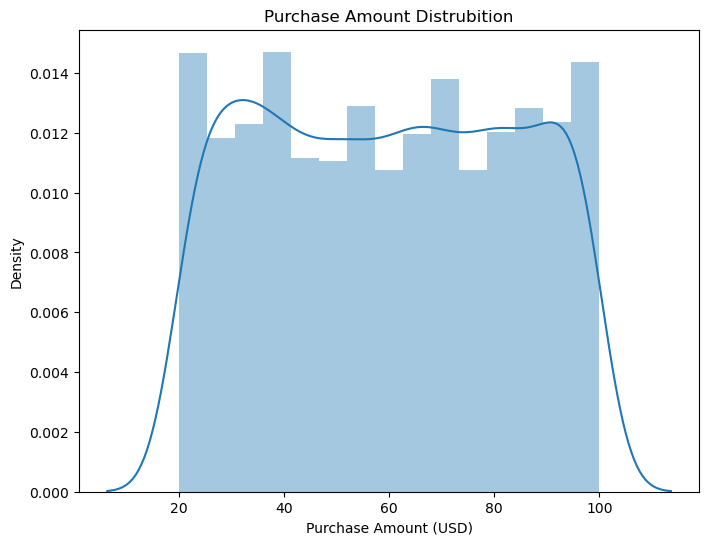

In [5]:
#While it shows that the purchase amounts are most densely distributed between USD 20 and USD 100, 
#the highest density is around USD 20 and the distribution is generally balanced.

plt.figure(figsize=(8,6))
sns.distplot(df["Purchase Amount (USD)"])
plt.title("Purchase Amount Distrubition")
plt.show()

In [6]:
df.groupby("Gender").agg(size=("Gender","size")
                        ,total_purchase_amount=("Purchase Amount (USD)","sum")
                        ,avg_purchase_amount=("Purchase Amount (USD)","mean")
                        ,median_purchase_amount=("Purchase Amount (USD)","median"))

,size,total_purchase_amount,avg_purchase_amount,median_purchase_amount
Gender,,,,
Female,1248,75191,60.249199,60.0
Male,2652,157890,59.536199,60.0


* **Mean is close to median, which we saw this before from our graph. This also means, our Purchase Amount distribution is balanced.**
* **Our male customers spended more money than our female customers. But, average purchase amount of female customers are higher then male customers.**

#### Male customers most preffered, categories, products and total purchase amounts by category and product

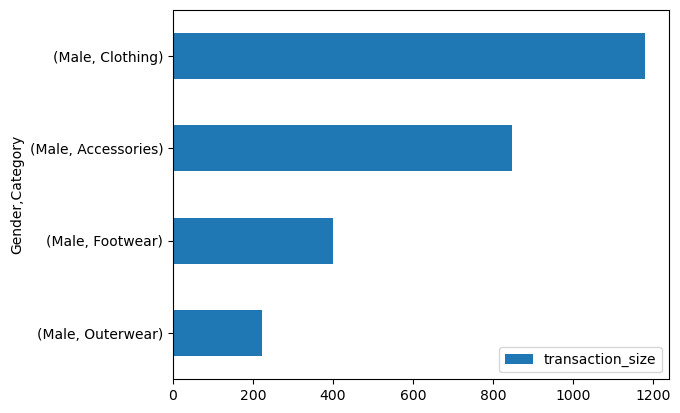

In [7]:
df[df["Gender"]=="Male"].groupby(["Gender","Category"]).agg(transaction_size=("Category","size")).sort_values(by="transaction_size",ascending=True).plot(kind="barh")
plt.show()

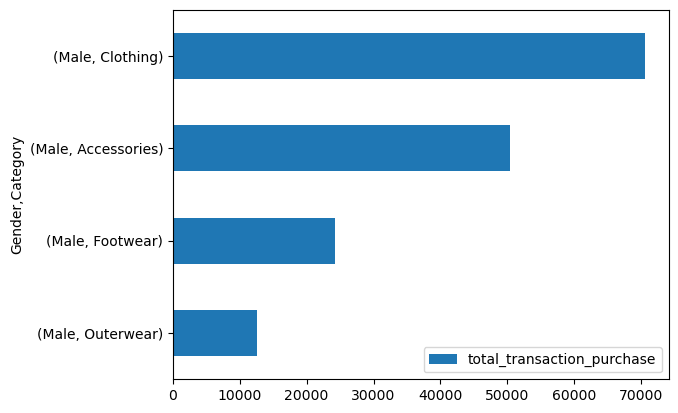

In [8]:
df[df["Gender"]=="Male"].groupby(["Gender","Category"]).agg(total_transaction_purchase=("Purchase Amount (USD)","sum")).sort_values(by="total_transaction_purchase",ascending=True).plot(kind="barh")
plt.show()

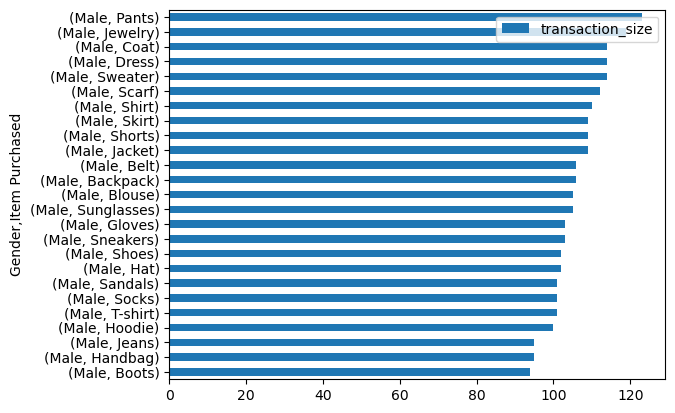

In [9]:
df[df["Gender"]=="Male"].groupby(["Gender","Item Purchased"]).agg(transaction_size=("Category","size")).sort_values(by="transaction_size",ascending=True).plot(kind="barh")
plt.show()

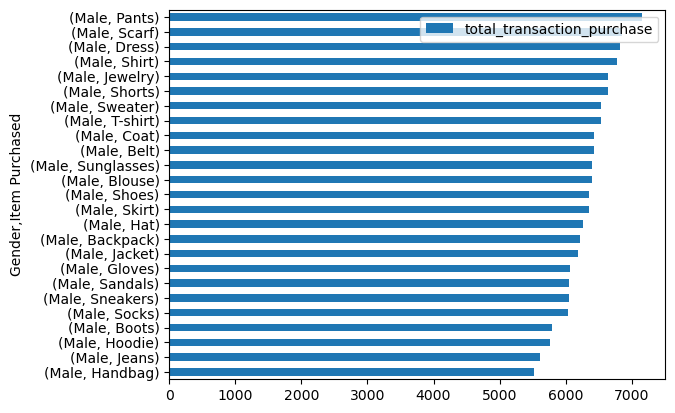

In [10]:
df[df["Gender"]=="Male"].groupby(["Gender","Item Purchased"]).agg(total_transaction_purchase=("Purchase Amount (USD)","sum")).sort_values(by="total_transaction_purchase",ascending=True).plot(kind="barh")
plt.show()

#### Female customers most preffered, categories, products and total purchase amounts by category and product

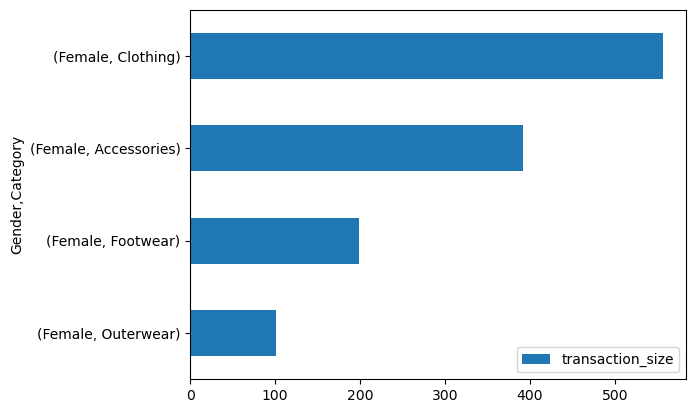

In [11]:
df[df["Gender"]=="Female"].groupby(["Gender","Category"]).agg(transaction_size=("Category","size")).sort_values(by="transaction_size",ascending=True).plot(kind="barh")
plt.show()

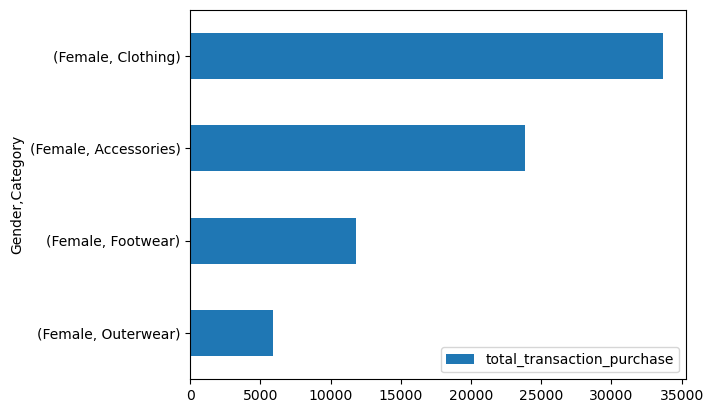

In [12]:
df[df["Gender"]=="Female"].groupby(["Gender","Category"]).agg(total_transaction_purchase=("Purchase Amount (USD)","sum")).sort_values(by="total_transaction_purchase",ascending=True).plot(kind="barh")
plt.show()

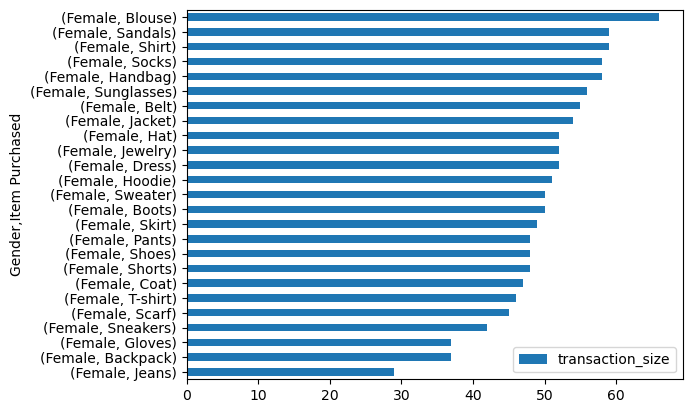

In [13]:
df[df["Gender"]=="Female"].groupby(["Gender","Item Purchased"]).agg(transaction_size=("Category","size")).sort_values(by="transaction_size",ascending=True).plot(kind="barh")
plt.show()

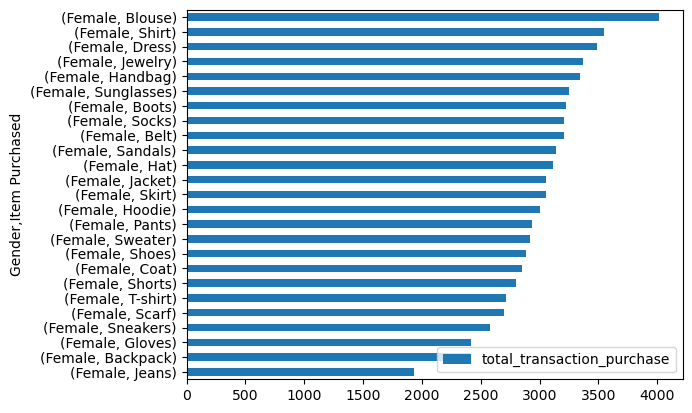

In [14]:
df[df["Gender"]=="Female"].groupby(["Gender","Item Purchased"]).agg(total_transaction_purchase=("Purchase Amount (USD)","sum")).sort_values(by="total_transaction_purchase",ascending=True).plot(kind="barh")
plt.show()

### So far, we checked our most sold and valuable categories and products for genders.

#### Male Customers:

* Most sold category is **clothing** for male customers
* Most valuable category is also **clothing** for male customers

* Most sold category is **pants** for male customers
* Most valuable category is also **pants** for male customers

#### Female Customers:

* Most sold category is **clothing** for female customers
* Most valuable category is also **clothing** for female customers

* Most sold product is **blouse** for female customers
* Most valuable category is also **blouse** for female customers

In [15]:
# Let's remind our dataset :)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## Now I'll focus on locations. Which location has the most customers, which location has purchased more products and which location has paid the most.

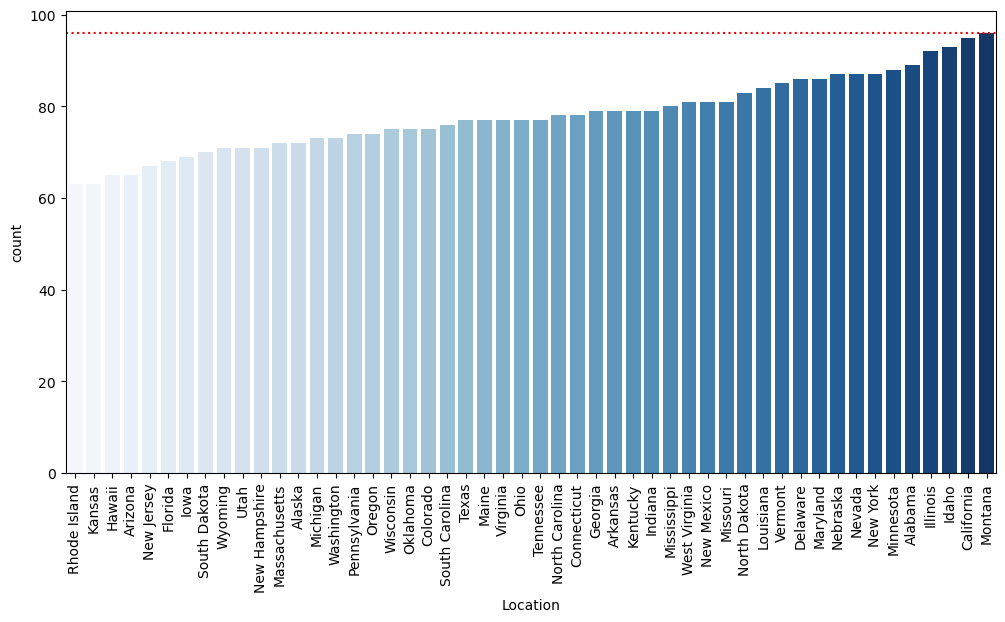

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["Location"],order=df["Location"].value_counts(ascending=True).index,palette="Blues")
plt.axhline(np.max(df["Location"].value_counts(ascending=True)),ls=":",c="r")
plt.xticks(rotation=90);

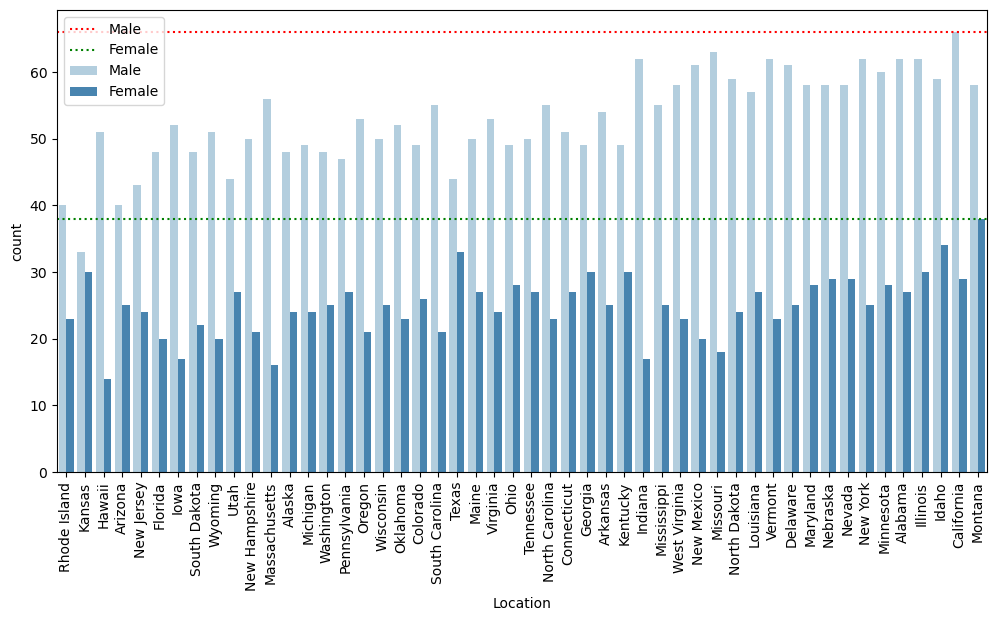

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["Location"],order=df["Location"].value_counts(ascending=True).index,hue=df["Gender"],palette="Blues")
plt.axhline(np.max(df[df["Gender"]=="Male"]["Location"].value_counts(ascending=True)),ls=":",c="r",label="Male")
plt.axhline(np.max(df[df["Gender"]=="Female"]["Location"].value_counts(ascending=True)),ls=":",c="g",label="Female")
plt.xticks(rotation=90)
plt.legend();

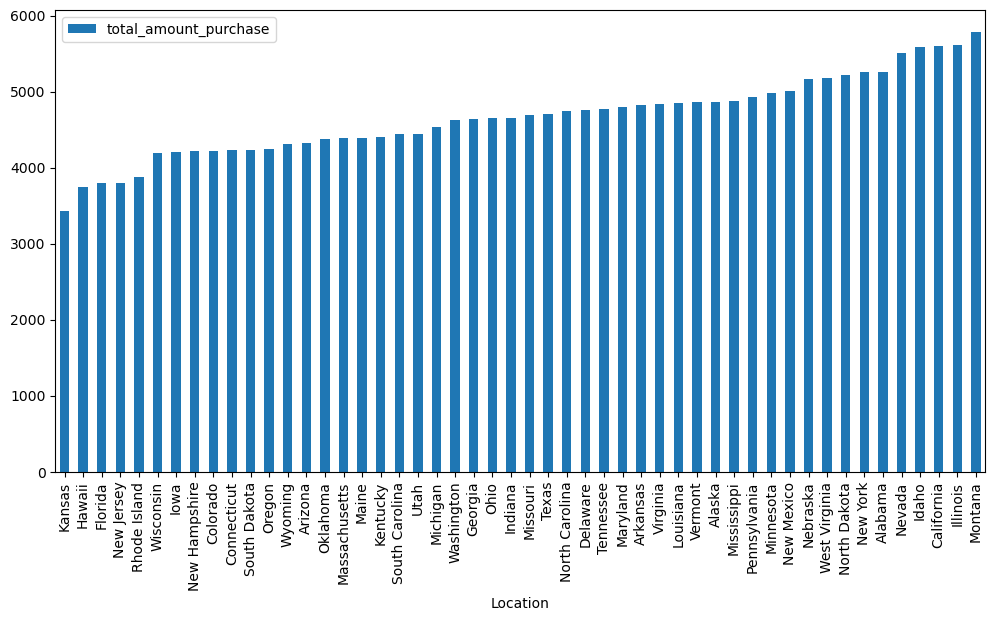

In [18]:
df.groupby("Location").agg(total_amount_purchase=("Purchase Amount (USD)","sum")).sort_values(by="total_amount_purchase").plot(kind="bar",figsize=(12,6));

In [19]:
location_gender_purchase_amount=df.groupby(["Gender","Location"]).agg(total_purchase_amount=("Purchase Amount (USD)","sum")).reset_index().sort_values(by="total_purchase_amount",ascending=False)
location_gender_purchase_amount

,Gender,Location,total_purchase_amount
97,Male,West Virginia,3935
54,Male,California,3869
61,Male,Idaho,3715
74,Male,Missouri,3701
62,Male,Illinois,3698
...,...,...,...
8,Female,Florida,1036
24,Female,Missouri,990
13,Female,Indiana,978
20,Female,Massachusetts,852


In [20]:
location_gender_purchase_amount[(location_gender_purchase_amount["Gender"]=="Male")].head(1)

,Gender,Location,total_purchase_amount
97,Male,West Virginia,3935


In [21]:
location_gender_purchase_amount[(location_gender_purchase_amount["Gender"]=="Female")].head(1)

,Gender,Location,total_purchase_amount
25,Female,Montana,2184


## Location based EDA

### The location with the most customers is Montana

### The most valuable location is the Montana

#### For female customers:

* **The location with the most female customers is Montana**
* **For female customers most valuable location is the also Montana**

#### For male customers:

* **The location with the most male customers is California**
* **For female customers most valuable location is the also West Virginia**

## We defined our most valuable locations, categories and products. Now let's check which season our customers most preffered. Cause, next time we can define our plans for seasons with locations or maybe just for seasons.

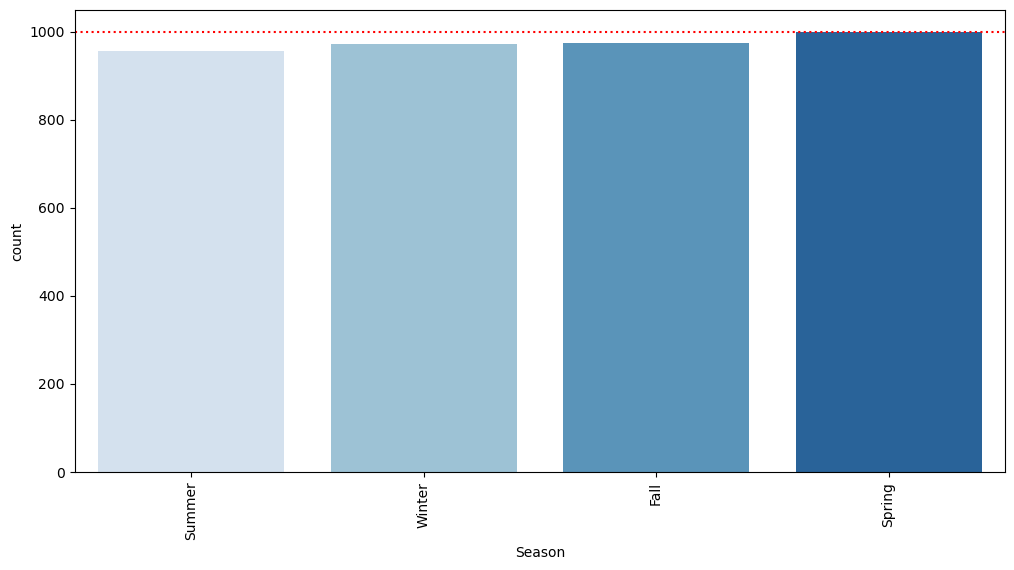

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["Season"],order=df["Season"].value_counts(ascending=True).index,palette="Blues")
plt.axhline(np.max(df["Season"].value_counts(ascending=True)),ls=":",c="r")
plt.xticks(rotation=90);

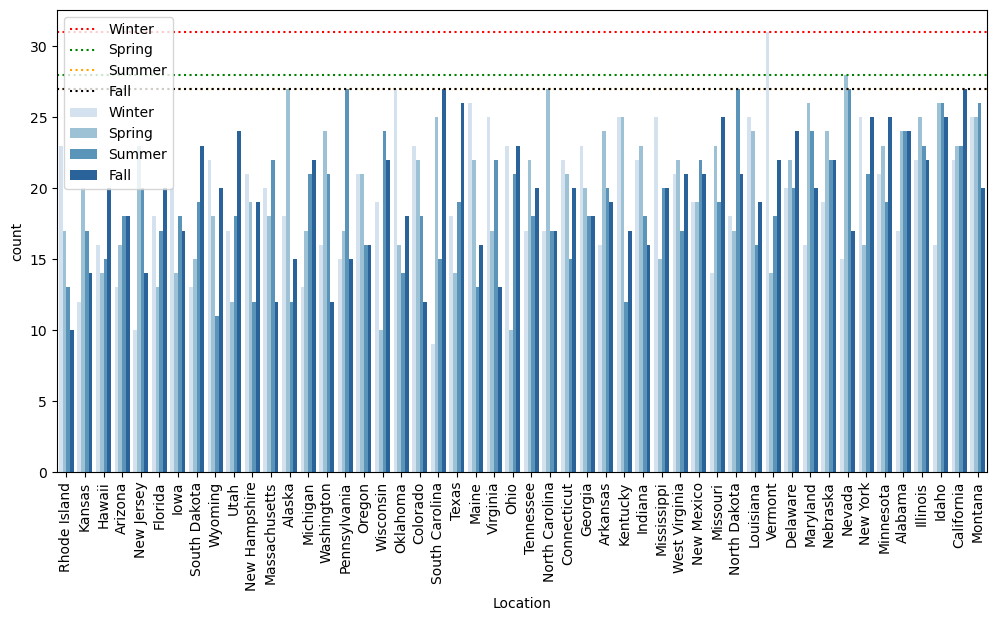

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["Location"],order=df["Location"].value_counts(ascending=True).index,hue=df["Season"],palette="Blues")
plt.axhline(np.max(df[df["Season"]=="Winter"]["Location"].value_counts(ascending=True)),ls=":",c="r",label="Winter")
plt.axhline(np.max(df[df["Season"]=="Spring"]["Location"].value_counts(ascending=True)),ls=":",c="g",label="Spring")
plt.axhline(np.max(df[df["Season"]=="Summer"]["Location"].value_counts(ascending=True)),ls=":",c="orange",label="Summer")
plt.axhline(np.max(df[df["Season"]=="Fall"]["Location"].value_counts(ascending=True)),ls=":",c="black",label="Fall")
plt.xticks(rotation=90)
plt.legend();

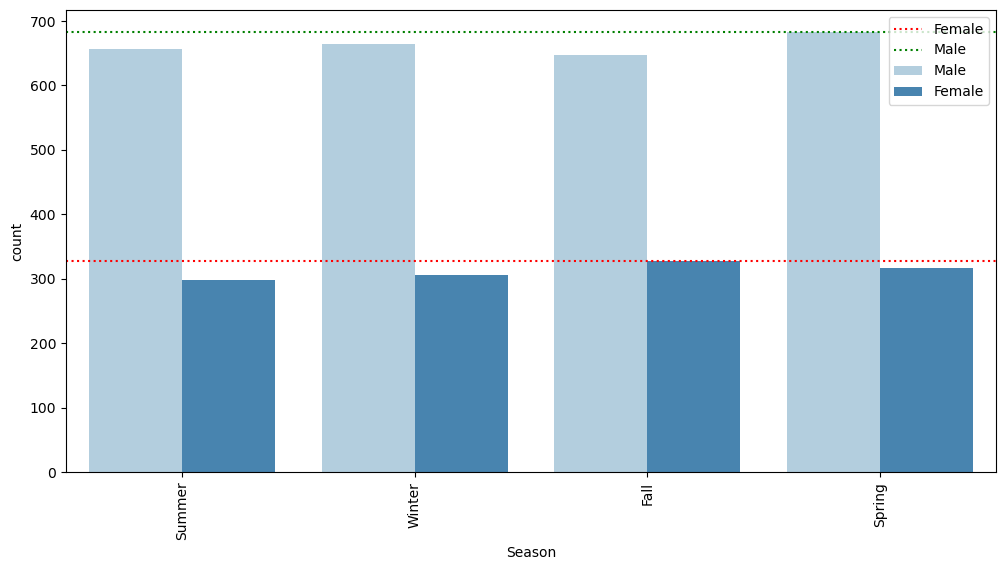

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["Season"],order=df["Season"].value_counts(ascending=True).index,hue=df["Gender"],palette="Blues")
plt.axhline(np.max(df[df["Gender"]=="Female"]["Season"].value_counts(ascending=True)),ls=":",c="r",label="Female")
plt.axhline(np.max(df[df["Gender"]=="Male"]["Season"].value_counts(ascending=True)),ls=":",c="g",label="Male")
plt.xticks(rotation=90)
plt.legend();

In [25]:
location_season_purchase_amount=df.groupby(["Season","Location"]).agg(total_purchase_amount=("Purchase Amount (USD)","sum")).reset_index().sort_values(by="total_purchase_amount",ascending=False)
location_season_purchase_amount

,Season,Location,total_purchase_amount
77,Spring,Nevada,1916
194,Winter,Vermont,1885
51,Spring,Alaska,1848
137,Summer,Pennsylvania,1753
195,Winter,Virginia,1752
...,...,...,...
5,Fall,Colorado,578
116,Summer,Kentucky,560
189,Winter,South Carolina,526
98,Spring,Wisconsin,513


In [26]:
location_season_purchase_amount.groupby("Season").agg(total_purchase_amount=("total_purchase_amount","sum")).sort_values(by="total_purchase_amount")

,total_purchase_amount
Season,
Summer,55777
Winter,58607
Spring,58679
Fall,60018


In [27]:
location_season_purchase_amount[(location_season_purchase_amount["Season"]=="Summer")].head(1)

,Season,Location,total_purchase_amount
137,Summer,Pennsylvania,1753


In [28]:
location_season_purchase_amount[(location_season_purchase_amount["Season"]=="Winter")].head(1)

,Season,Location,total_purchase_amount
194,Winter,Vermont,1885


In [29]:
location_season_purchase_amount[(location_season_purchase_amount["Season"]=="Spring")].head(1)

,Season,Location,total_purchase_amount
77,Spring,Nevada,1916


In [30]:
location_season_purchase_amount[(location_season_purchase_amount["Season"]=="Fall")].head(1)

,Season,Location,total_purchase_amount
42,Fall,Texas,1732


## Season based EDA

### The season with the most sales is Spring.

### The most valuable season is the Fall.

#### For female customers:

* **The season with the most sales for female customers is Fall**

#### For male customers:

* **The season with the most sales for male customers is Spring**

## For now I'm finishing EDA. We gained some insights by this year sales. Now I'll create customer segmentation based customer's behaviors.

* **First I'll check categorical dtypes unique values**
* **Then I'll use pd.get_dummies() for changing categorical values to the numerical values.**
* **At the end, I'll use K-Means for clustering**

In [31]:
# Let's remind our dataset again :)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


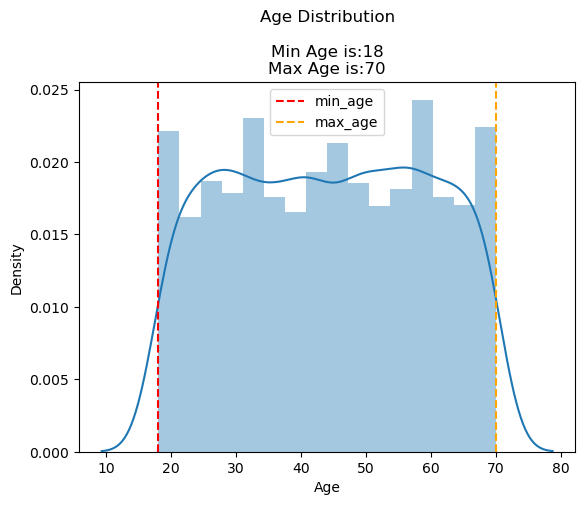

In [32]:
min_age=df["Age"].min()
max_age=df["Age"].max()

sns.distplot(df["Age"])
plt.axvline(min_age,ls="--",c="red",label="min_age")
plt.axvline(max_age,ls="--",c="orange",label="max_age")
plt.title(f"Age Distribution\n\nMin Age is:{min_age}\nMax Age is:{max_age}")
plt.legend();

In [33]:
df["Age Labels"]=df["Age"].apply(lambda x:"18-30" if x<30 else("30-40" if x< 40 else("40-50" if x<50 else("50-60" if x<60 else "60+"))))
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Labels
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,50-60
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,18-30
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,50-60
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-30
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,40-50


### I labeled our Age feature. With this labeling, I can use age variable for our K-Means model.

In [34]:
df["Item Purchased"].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [35]:
df["Category"].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [36]:
df["Location"].unique()

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

In [37]:
df["Size"].unique()

array(['L', 'S', 'M', 'XL'], dtype=object)

In [38]:
df["Season"].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [39]:
df["Subscription Status"].unique()

array(['Yes', 'No'], dtype=object)

In [40]:
df["Preferred Payment Method"].unique()

array(['Venmo', 'Cash', 'Credit Card', 'PayPal', 'Bank Transfer',
       'Debit Card'], dtype=object)

In [41]:
df["Preferred Payment Method"].value_counts()

PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: Preferred Payment Method, dtype: int64

### This payment types are typically same actually. There is customers who pays online or not. Now I'll use this.

In [42]:
df["is_preffered_payment_online"]=df["Preferred Payment Method"].apply(lambda x: "not_online" if x=="Cash" else "online")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Labels,is_preffered_payment_online
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,50-60,online
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,18-30,not_online
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,50-60,online
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-30,online
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,40-50,online


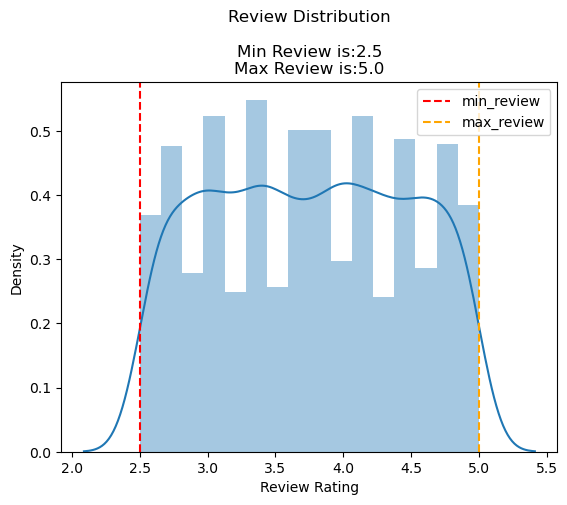

In [43]:
min_review=df["Review Rating"].min()
max_review=df["Review Rating"].max()

sns.distplot(df["Review Rating"])
plt.axvline(min_review,ls="--",c="red",label="min_review")
plt.axvline(max_review,ls="--",c="orange",label="max_review")
plt.title(f"Review Distribution\n\nMin Review is:{min_review}\nMax Review is:{max_review}")
plt.legend();

In [44]:
df["Review Labels"]=df["Review Rating"].apply(lambda x:"low_review" if x<3.5 else("medium_review" if x<4. else "high_review"))
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Labels,is_preffered_payment_online,Review Labels
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,50-60,online,low_review
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,18-30,not_online,low_review
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,50-60,online,low_review
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-30,online,medium_review
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,40-50,online,low_review


### I labeled our Review Rating feature too. Also with this labeling, I can use review variable for our K-Means model.

In [45]:
# If promo code used is Yes then discount applied is Yes also. So, if someone applied a discount then someone also used a promo code.

df[(df["Promo Code Used"]=="Yes") & (df["Discount Applied"]=="Yes")]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Labels,is_preffered_payment_online,Review Labels
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,50-60,online,low_review
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,18-30,not_online,low_review
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,50-60,online,low_review
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-30,online,medium_review
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,40-50,online,low_review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,1673,18,Male,Boots,Footwear,73,South Carolina,L,Gold,Fall,3.8,No,Debit Card,Free Shipping,Yes,Yes,15,Venmo,Quarterly,18-30,online,medium_review
1673,1674,21,Male,Blouse,Clothing,62,Hawaii,M,Violet,Fall,3.4,No,Debit Card,Next Day Air,Yes,Yes,49,Venmo,Bi-Weekly,18-30,online,low_review
1674,1675,35,Male,Coat,Outerwear,56,Alaska,M,Peach,Winter,3.2,No,PayPal,Free Shipping,Yes,Yes,10,Debit Card,Fortnightly,30-40,online,low_review
1675,1676,35,Male,Pants,Clothing,90,Colorado,M,Beige,Spring,4.7,No,Venmo,Next Day Air,Yes,Yes,21,Credit Card,Annually,30-40,online,high_review


### Now let's think again about clustering. Cause, this data contains customer's latest purchases. So, what is our purpose for clustering will be lead our way.

* **Purpose of clustering:** I'll assume like this purchases stands for latest purchases which it's affects our clustering. But yeah, I'll consider this dataset like that. So, at the end of clustering we'll observe our customers clusters by this purpose. My main purpose will be segmenting our customers by their latest purchase behaviors like how they choose their purchases.

* 🔑 **Considerable clustering ideas:** May your purpose could be something like clustering by customers demographical information for this dataset. Another one is, you can cluster your customers by their behaviors like applying discount, payment methods etc.. So there is not just one clustering algorithm may cannot be meaningful so you can redesing your clustering ideas by your goal.

* **Feature Choose for clustering:** Some of this features are not about latest purchases. So they may affect our clustering. That's why I'll choose right datasets for our purpose of clustering.


**I'll redefine our df dataset for my purpose of clustering**

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
to_clustering=df.copy()
to_clustering=to_clustering.sample(frac=1).set_index("Customer ID")
to_clustering

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Labels,is_preffered_payment_online,Review Labels
Customer ID,,,,,,,,,,,,,,,,,,,,,
2214,54,Male,Hat,Accessories,94,Hawaii,M,Maroon,Fall,2.9,No,Credit Card,Express,No,No,18,Debit Card,Quarterly,50-60,online,low_review
122,19,Male,Shorts,Clothing,72,Virginia,M,Olive,Winter,4.2,Yes,Cash,Standard,Yes,Yes,11,Cash,Fortnightly,18-30,not_online,high_review
194,36,Male,Belt,Accessories,100,North Dakota,S,Silver,Fall,3.0,Yes,PayPal,Standard,Yes,Yes,29,Venmo,Annually,30-40,online,low_review
1624,64,Male,Backpack,Accessories,58,Indiana,M,Cyan,Summer,3.5,No,Venmo,Next Day Air,Yes,Yes,50,Debit Card,Annually,60+,online,medium_review
3286,58,Female,Hat,Accessories,31,Hawaii,XL,Magenta,Fall,4.6,No,PayPal,Free Shipping,No,No,11,Cash,Weekly,50-60,not_online,high_review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324,54,Female,Handbag,Accessories,78,North Dakota,M,Yellow,Winter,3.8,No,Venmo,Free Shipping,No,No,4,Credit Card,Monthly,50-60,online,medium_review
1004,56,Male,Hat,Accessories,68,Ohio,M,Green,Fall,4.0,Yes,Cash,Store Pickup,Yes,Yes,3,Cash,Bi-Weekly,50-60,not_online,high_review
3422,57,Female,Shoes,Footwear,30,New Jersey,M,Maroon,Summer,2.9,No,PayPal,Free Shipping,No,No,27,PayPal,Weekly,50-60,online,low_review


In [48]:
to_clustering["Gender Encoded"]=LabelEncoder().fit_transform(to_clustering["Gender"])
to_clustering["Item Purchased Encoded"]=LabelEncoder().fit_transform(to_clustering["Item Purchased"])
to_clustering["Category Encoded"]=LabelEncoder().fit_transform(to_clustering["Category"])
to_clustering["Size Encoded"]=LabelEncoder().fit_transform(to_clustering["Size"])
to_clustering["Color Encoded"]=LabelEncoder().fit_transform(to_clustering["Color"])
to_clustering["Season Encoded"]=LabelEncoder().fit_transform(to_clustering["Season"])
to_clustering.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Labels,is_preffered_payment_online,Review Labels,Gender Encoded,Item Purchased Encoded,Category Encoded,Size Encoded,Color Encoded,Season Encoded
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
2214,54,Male,Hat,Accessories,94,Hawaii,M,Maroon,Fall,2.9,No,Credit Card,Express,No,No,18,Debit Card,Quarterly,50-60,online,low_review,1,8,0,1,12,0
122,19,Male,Shorts,Clothing,72,Virginia,M,Olive,Winter,4.2,Yes,Cash,Standard,Yes,Yes,11,Cash,Fortnightly,18-30,not_online,high_review,1,18,1,1,13,3
194,36,Male,Belt,Accessories,100,North Dakota,S,Silver,Fall,3.0,Yes,PayPal,Standard,Yes,Yes,29,Venmo,Annually,30-40,online,low_review,1,1,0,2,19,0
1624,64,Male,Backpack,Accessories,58,Indiana,M,Cyan,Summer,3.5,No,Venmo,Next Day Air,Yes,Yes,50,Debit Card,Annually,60+,online,medium_review,1,0,0,1,5,2
3286,58,Female,Hat,Accessories,31,Hawaii,XL,Magenta,Fall,4.6,No,PayPal,Free Shipping,No,No,11,Cash,Weekly,50-60,not_online,high_review,0,8,0,3,11,0


In [49]:
columns_for_clustering=[]

for i in to_clustering.columns:
    if i.find("Encoded")!=-1:
        columns_for_clustering.append(i)
        
    elif i.find("ID")!=-1:
        columns_for_clustering.append(i)
        

to_clustering=to_clustering[columns_for_clustering]
to_clustering

,Gender Encoded,Item Purchased Encoded,Category Encoded,Size Encoded,Color Encoded,Season Encoded
Customer ID,,,,,,
2214,1,8,0,1,12,0
122,1,18,1,1,13,3
194,1,1,0,2,19,0
1624,1,0,0,1,5,2
3286,0,8,0,3,11,0
...,...,...,...,...,...,...
3324,0,7,0,1,24,3
1004,1,8,0,1,8,0
3422,0,17,2,1,12,2


### Let's call library that we need.

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [51]:
numerical_features = to_clustering.drop("Gender Encoded",axis=1)
binary_features = to_clustering["Gender Encoded"]

numerical_features_scaled = StandardScaler().fit_transform(numerical_features)
numerical_features_scaled = pd.DataFrame(numerical_features_scaled,columns=numerical_features.columns,index=numerical_features.index)
concatted_scaled = pd.concat([binary_features,numerical_features_scaled],axis=1)
concatted = pd.concat([binary_features,numerical_features],axis=1)

### Now, let's build our clustering algorithm with KMeans

* **First, I'll use elbow method for choosing right n value for KMeans.**
* **Second, I'll apply our model to the concatted dataset, and I'll add our labels to the concatted dataset.**
* **Third, visuals visaulize visualizing :)**

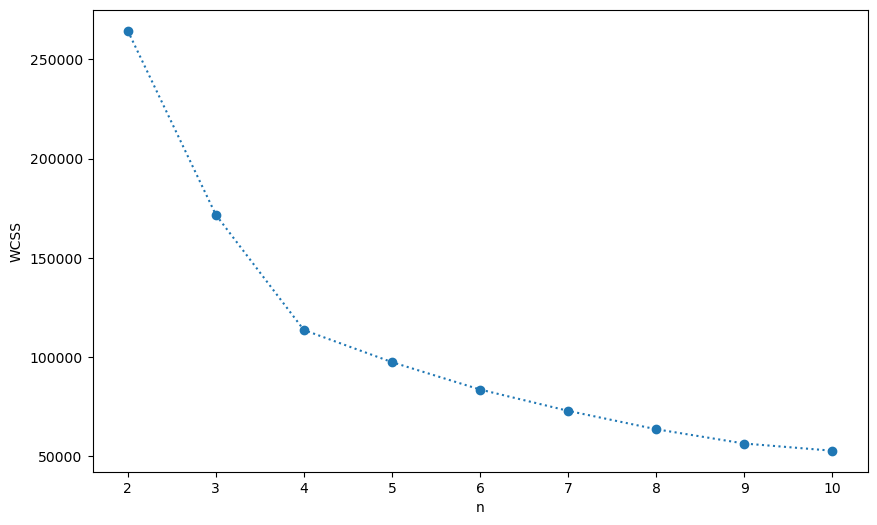

In [52]:
wcss = []

for i in range(2,11):
    model = KMeans(n_clusters=i).fit(concatted)
    wcss.append(model.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(2,11),wcss,ls=":",marker="o")
plt.xlabel("n")
plt.ylabel("WCSS")
plt.show()

In [53]:
clustering_model = KMeans(n_clusters=4).fit(concatted)
clustering_model

KMeans(n_clusters=4)

In [54]:
clustering_model.labels_

array([1, 3, 1, ..., 3, 1, 3])

In [55]:
to_clustering["clusters"]=clustering_model.labels_
to_clustering=to_clustering.reset_index()
to_clustering

,Customer ID,Gender Encoded,Item Purchased Encoded,Category Encoded,Size Encoded,Color Encoded,Season Encoded,clusters
0,2214,1,8,0,1,12,0,1
1,122,1,18,1,1,13,3,3
2,194,1,1,0,2,19,0,1
3,1624,1,0,0,1,5,2,2
4,3286,0,8,0,3,11,0,2
...,...,...,...,...,...,...,...,...
3895,3324,0,7,0,1,24,3,1
3896,1004,1,8,0,1,8,0,2
3897,3422,0,17,2,1,12,2,3
3898,1304,1,2,1,0,19,2,1


In [56]:
df=df.merge(to_clustering,on="Customer ID")
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Labels,is_preffered_payment_online,Review Labels,Gender Encoded,Item Purchased Encoded,Category Encoded,Size Encoded,Color Encoded,Season Encoded,clusters
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,50-60,online,low_review,1,2,1,0,7,3,2
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,18-30,not_online,low_review,1,23,1,0,12,3,3
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,50-60,online,low_review,1,11,1,2,12,1,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-30,online,medium_review,1,14,2,1,12,1,3
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,40-50,online,low_review,1,2,1,1,21,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly,40-50,online,high_review,0,9,1,0,21,2,1
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,50-60,online,high_review,0,0,0,0,23,1,1
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly,40-50,online,low_review,0,1,0,0,8,1,2
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly,40-50,online,medium_review,0,17,2,2,3,2,0


In [57]:
# Let's check is our clustering correctly merged
df[df["Customer ID"]==203]
# Yep, it's working :)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Labels,is_preffered_payment_online,Review Labels,Gender Encoded,Item Purchased Encoded,Category Encoded,Size Encoded,Color Encoded,Season Encoded,clusters
202,203,57,Male,Hat,Accessories,38,Nebraska,L,Magenta,Spring,2.7,Yes,Bank Transfer,Express,Yes,Yes,33,Venmo,Annually,50-60,online,low_review,1,8,0,0,11,1,2


### Clusters Distribution

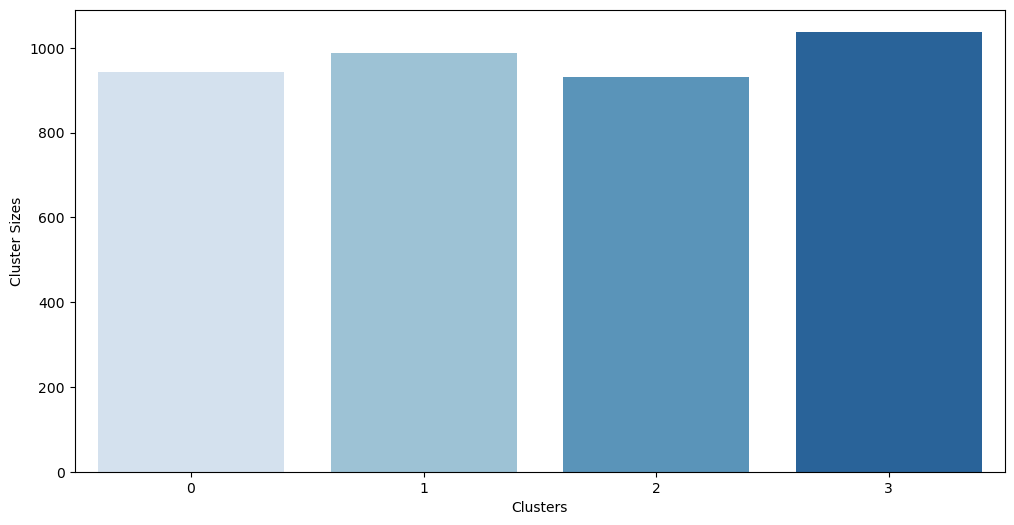

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.groupby("clusters").size().reset_index()["clusters"],y=df.groupby("clusters").size().reset_index()[0],palette="Blues")
plt.ylabel("Cluster Sizes")
plt.xlabel("Clusters")
plt.show()

### Clusters Distribution by Gender

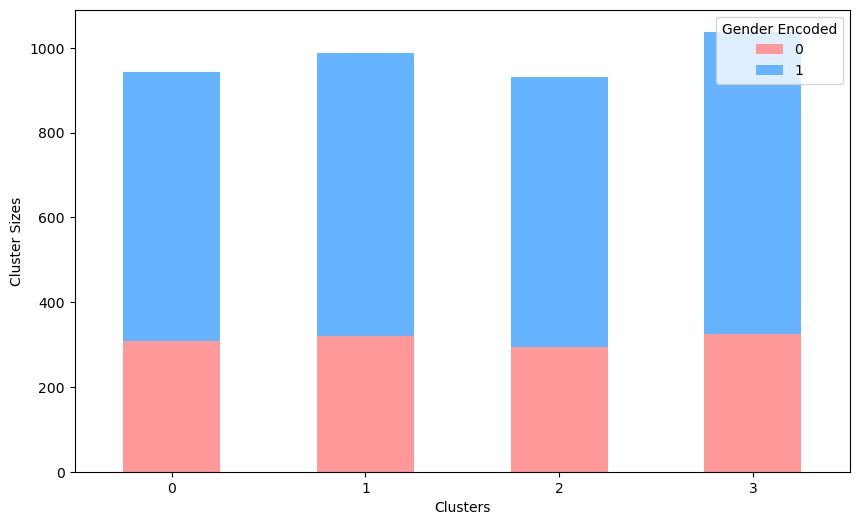

In [59]:
df.groupby(["clusters","Gender Encoded"]).size().unstack().plot(kind="bar",stacked=True,color=['#ff9999','#66b3ff'], figsize=(10, 6))
plt.xlabel("Clusters")
plt.ylabel("Cluster Sizes")
plt.xticks(rotation=0)
plt.show()

### Cluster Distribution by Item Purchased

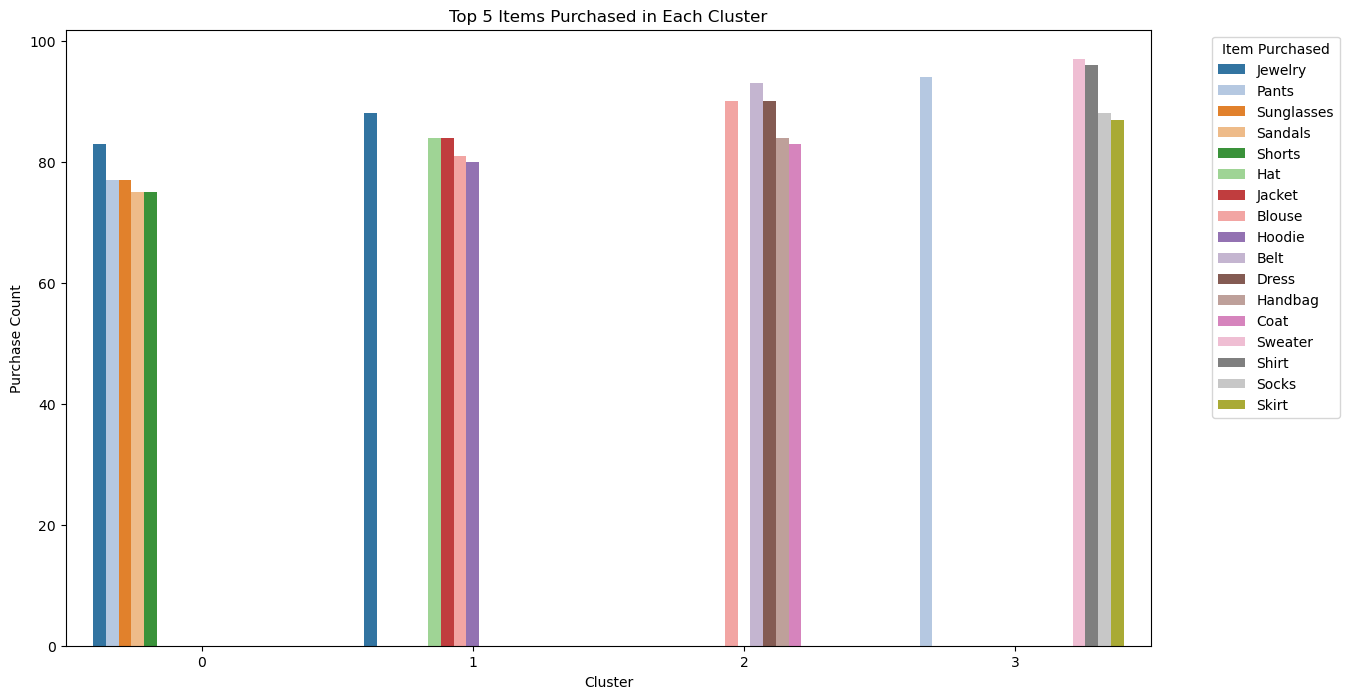

In [60]:
top_items_per_cluster = df.groupby(["clusters", "Item Purchased"]).size().groupby(level=0,group_keys=False).nlargest(5).reset_index(name="count")
# Creating a barplot for items purchased per cluster
palette = sns.cubehelix_palette(25, start=.5, rot=-.75)

plt.figure(figsize=(14,8))
sns.barplot(x='clusters', y='count', hue='Item Purchased', data=top_items_per_cluster,palette="tab20")
plt.title('Top 5 Items Purchased in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Purchase Count')
plt.legend(title='Item Purchased', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Cluster Distribution by Category

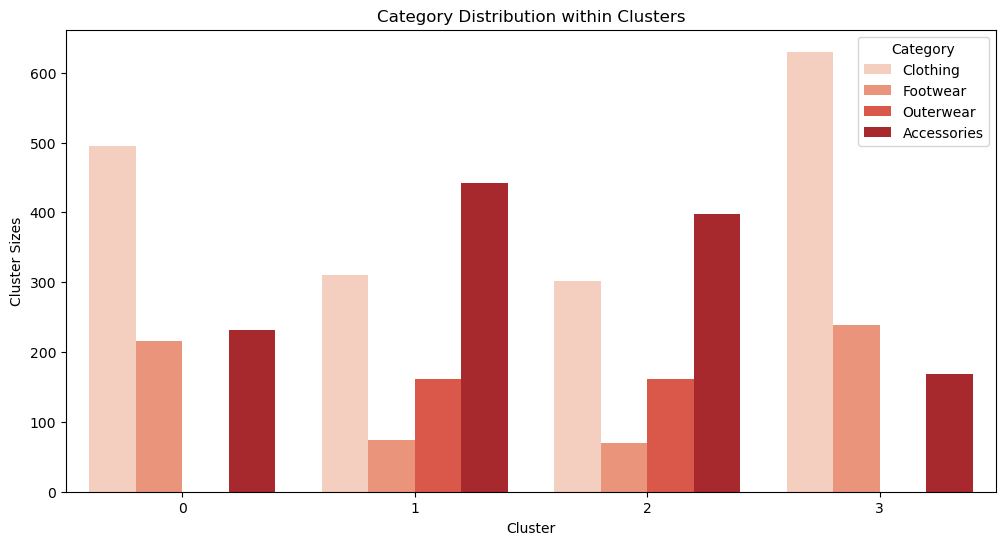

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(x='clusters', hue='Category', data=df, palette="Reds")
plt.title('Category Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Cluster Sizes')
plt.legend(title='Category', loc='best')
plt.show()

### Cluster Distribution by Size

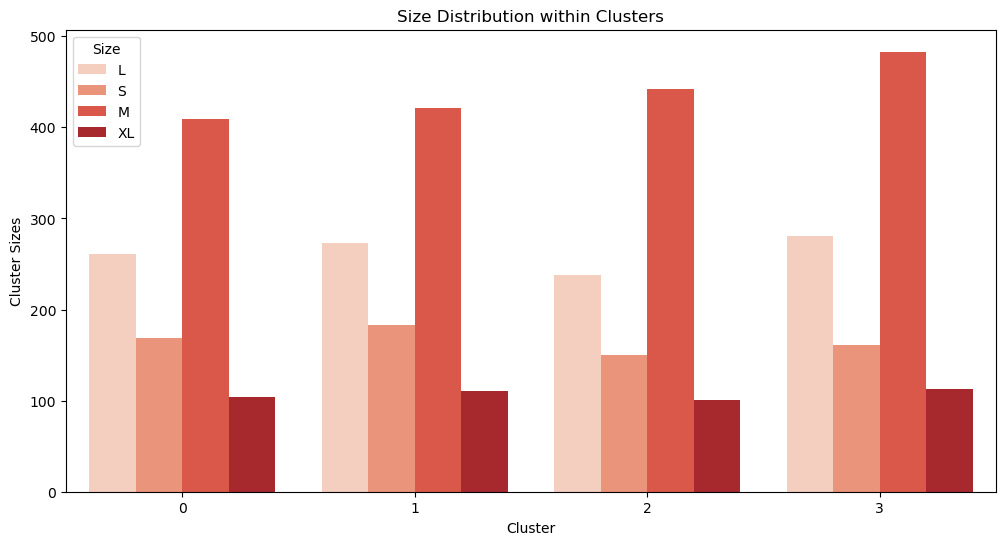

In [62]:
plt.figure(figsize=(12,6))
sns.countplot(x='clusters', hue='Size', data=df, palette="Reds")
plt.title('Size Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Cluster Sizes')
plt.legend(title='Size', loc='best')
plt.show()

### Cluster Distribution by Color

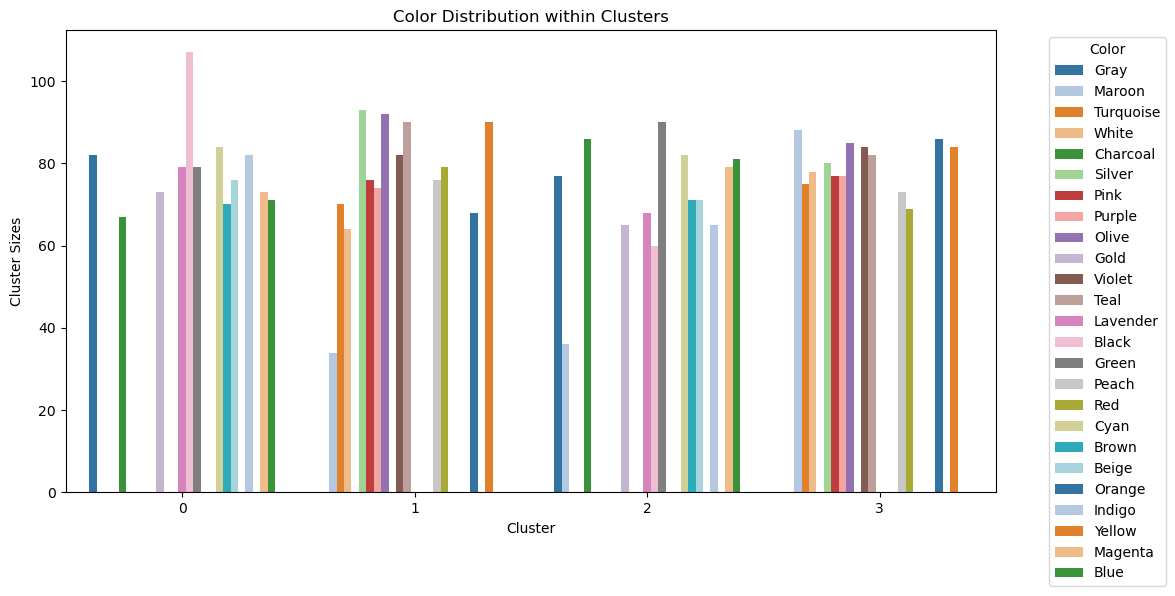

In [63]:
plt.figure(figsize=(12,6))
sns.countplot(x='clusters', hue='Color', data=df, palette="tab20")
plt.title('Color Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Cluster Sizes')
plt.legend(title='Color', bbox_to_anchor=(1.05, 1), loc='best')
plt.show()

### Cluster Distribution by Season

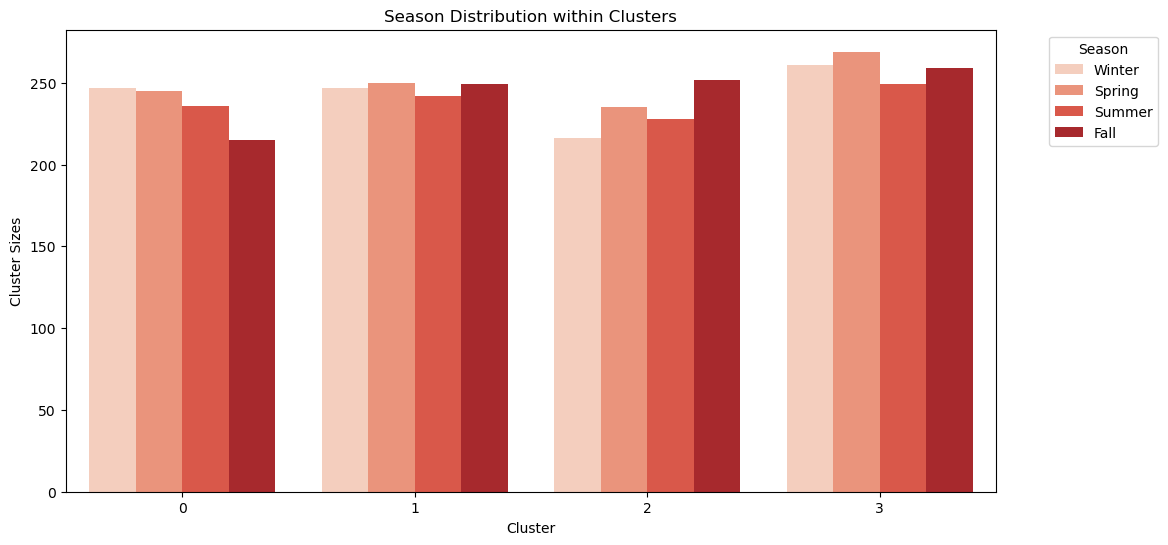

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(x='clusters', hue='Season', data=df, palette="Reds")
plt.title('Season Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Cluster Sizes')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='best')
plt.show()

In [65]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Labels,is_preffered_payment_online,Review Labels,Gender Encoded,Item Purchased Encoded,Category Encoded,Size Encoded,Color Encoded,Season Encoded,clusters
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,50-60,online,low_review,1,2,1,0,7,3,2
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,18-30,not_online,low_review,1,23,1,0,12,3,3
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,50-60,online,low_review,1,11,1,2,12,1,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-30,online,medium_review,1,14,2,1,12,1,3
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,40-50,online,low_review,1,2,1,1,21,1,1


### I'll try another clustering algorithm which it is KModes

In [66]:
from kmodes.kmodes import KModes

In [67]:
concatted_kmodes = concatted.copy()
concatted_kmodes.columns = concatted.columns+"_kmodes"
concatted_kmodes

,Gender Encoded_kmodes,Item Purchased Encoded_kmodes,Category Encoded_kmodes,Size Encoded_kmodes,Color Encoded_kmodes,Season Encoded_kmodes
Customer ID,,,,,,
2214,1,8,0,1,12,0
122,1,18,1,1,13,3
194,1,1,0,2,19,0
1624,1,0,0,1,5,2
3286,0,8,0,3,11,0
...,...,...,...,...,...,...
3324,0,7,0,1,24,3
1004,1,8,0,1,8,0
3422,0,17,2,1,12,2


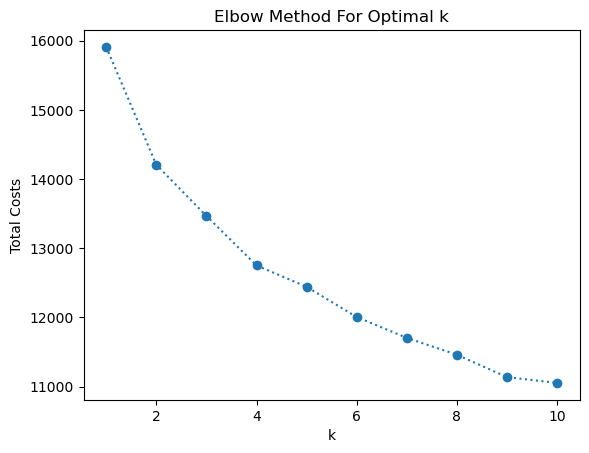

In [68]:
costs = []
K = range(1,11)  # Örnek olarak 1'den 10'a kadar küme sayısını deneyin

for k in K:
    km = KModes(n_clusters=k, init='Huang', n_init=5)
    km.fit_predict(concatted_kmodes)
    costs.append(km.cost_)

# Elbow grafiğini çizin
plt.plot(K, costs, ls=':', marker='o')
plt.xlabel('k')
plt.ylabel('Total Costs')
plt.title('Elbow Method For Optimal k')
plt.show()

In [69]:
kmodes_model = KModes(n_clusters=8,init="Huang",n_init=5)
kmodes_model

KModes(init='Huang', n_init=5)

In [70]:
kmodes_model.fit_predict(concatted_kmodes, categorical=[0,1,2,3,4,5,6,7])

array([0, 5, 2, ..., 4, 4, 0], dtype=uint16)

In [71]:
concatted_kmodes["kmodes_clusters"]=kmodes_model.labels_
concatted_kmodes=concatted_kmodes.reset_index()
concatted_kmodes

,Customer ID,Gender Encoded_kmodes,Item Purchased Encoded_kmodes,Category Encoded_kmodes,Size Encoded_kmodes,Color Encoded_kmodes,Season Encoded_kmodes,kmodes_clusters
0,2214,1,8,0,1,12,0,0
1,122,1,18,1,1,13,3,5
2,194,1,1,0,2,19,0,2
3,1624,1,0,0,1,5,2,0
4,3286,0,8,0,3,11,0,2
...,...,...,...,...,...,...,...,...
3895,3324,0,7,0,1,24,3,1
3896,1004,1,8,0,1,8,0,0
3897,3422,0,17,2,1,12,2,4
3898,1304,1,2,1,0,19,2,4


In [72]:
df=df.merge(concatted_kmodes,on="Customer ID")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Labels,is_preffered_payment_online,Review Labels,Gender Encoded,Item Purchased Encoded,Category Encoded,Size Encoded,Color Encoded,Season Encoded,clusters,Gender Encoded_kmodes,Item Purchased Encoded_kmodes,Category Encoded_kmodes,Size Encoded_kmodes,Color Encoded_kmodes,Season Encoded_kmodes,kmodes_clusters
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,50-60,online,low_review,1,2,1,0,7,3,2,1,2,1,0,7,3,5
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,18-30,not_online,low_review,1,23,1,0,12,3,3,1,23,1,0,12,3,5
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,50-60,online,low_review,1,11,1,2,12,1,1,1,11,1,2,12,1,7
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-30,online,medium_review,1,14,2,1,12,1,3,1,14,2,1,12,1,0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,40-50,online,low_review,1,2,1,1,21,1,1,1,2,1,1,21,1,5


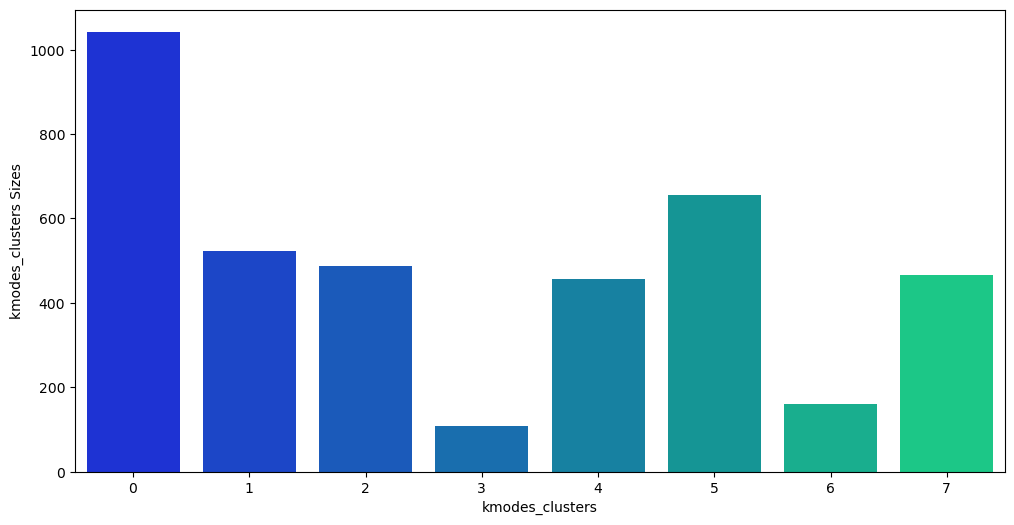

In [73]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.groupby("kmodes_clusters").size().reset_index()["kmodes_clusters"],y=df.groupby("kmodes_clusters").size().reset_index()[0],palette="winter")
plt.ylabel("kmodes_clusters Sizes")
plt.xlabel("kmodes_clusters")
plt.show()

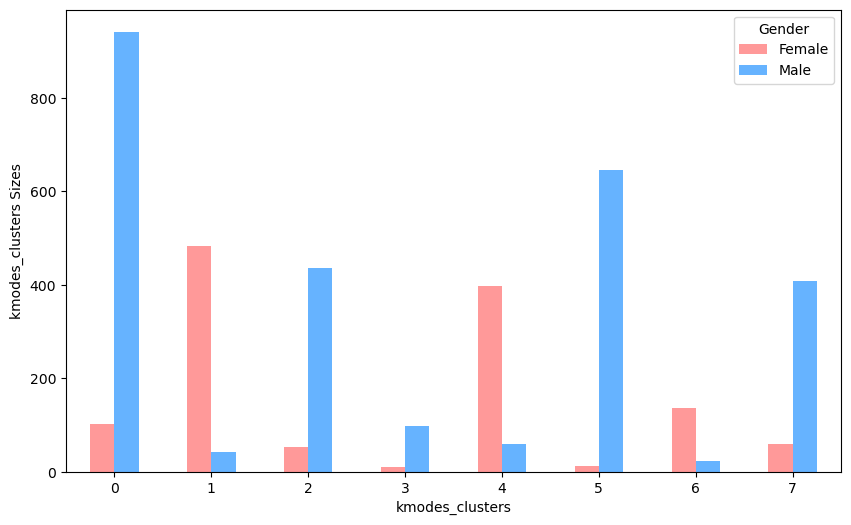

In [74]:
df.groupby(["kmodes_clusters","Gender"]).size().unstack().plot(kind="bar",stacked=False,color=['#ff9999','#66b3ff'], figsize=(10, 6))
plt.xlabel("kmodes_clusters")
plt.ylabel("kmodes_clusters Sizes")
plt.xticks(rotation=0)
plt.show()

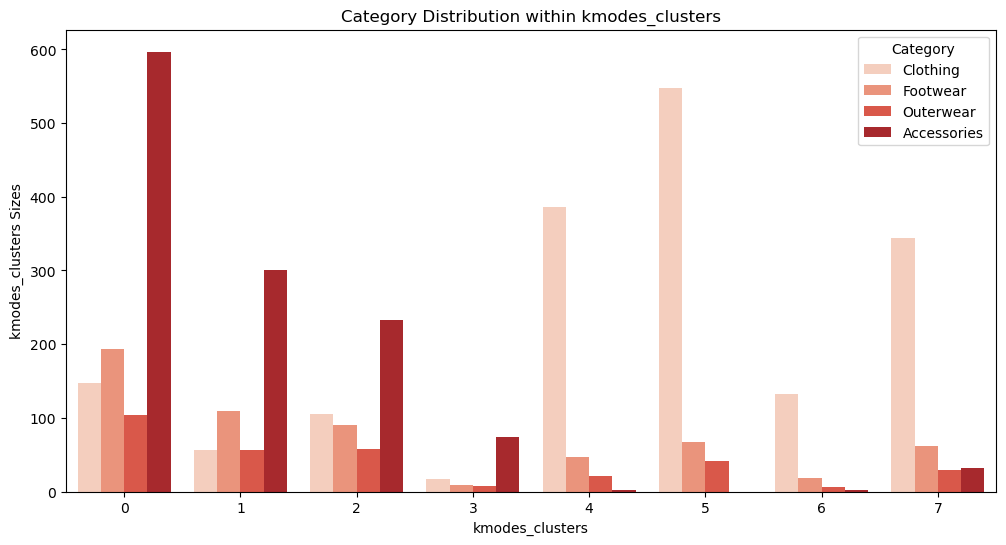

In [75]:
plt.figure(figsize=(12,6))
sns.countplot(x='kmodes_clusters', hue='Category', data=df, palette="Reds")
plt.title('Category Distribution within kmodes_clusters')
plt.xlabel('kmodes_clusters')
plt.ylabel('kmodes_clusters Sizes')
plt.legend(title='Category', loc='best')
plt.show()

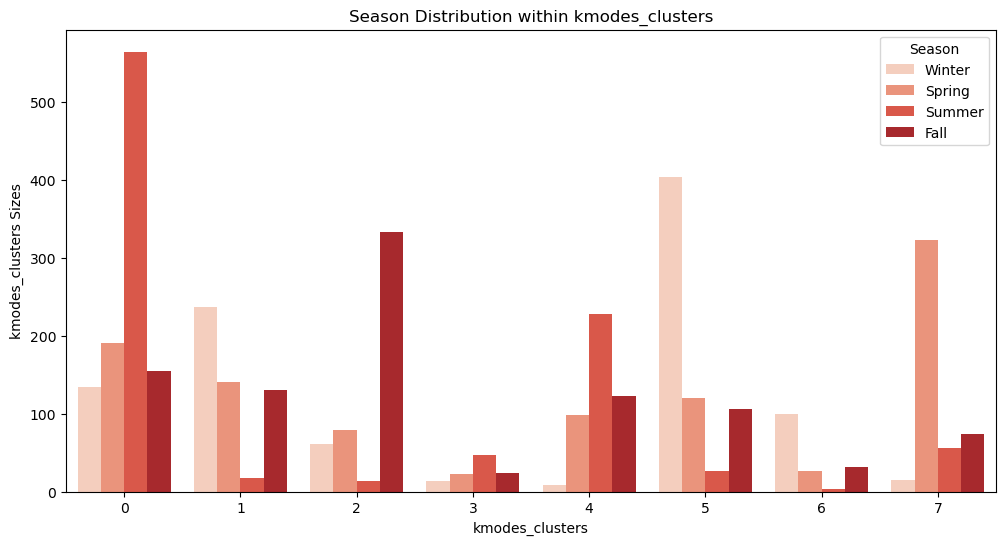

In [76]:
plt.figure(figsize=(12,6))
sns.countplot(x='kmodes_clusters', hue='Season', data=df, palette="Reds")
plt.title('Season Distribution within kmodes_clusters')
plt.xlabel('kmodes_clusters')
plt.ylabel('kmodes_clusters Sizes')
plt.legend(title='Season', loc='best')
plt.show()

# End and Discussion


**Our KMeans segmentation is not that powerfull to segment our customers by choosed (Gender, Item Purchased, Category, Size, Color, Season) features. But, KModes is worked well I think. Cause, we can choose different seasons, categories, genders by KModes segmentations.**

**KMeans segmentations are very familiar with each other. But, KModes segmentations are very unique.**

**At the end of the day, we can continue with KModes. Now we can change or redefine our marketing campaigns by this segmentation or maybe we can plan our stocks. Now we know which segment is purchasing at which season or category :)**

**Thank you for your valuable time, have a good growing 😉**